In [37]:
!pip install pandas
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [38]:
import pandas as pd

In [39]:
general_information = pd.read_csv('data/general_information_bkp.csv', low_memory=False)
type_and_level = pd.read_csv('data/type_and_level_bk.csv', low_memory=False)
geographical_facilities = pd.read_csv('data/geographical_facilities_bkp.csv', low_memory=False)
buildings_and_library = pd.read_csv('data/buildings_and_library.csv', low_memory=False)
compliance1 = pd.read_csv('data/compliance_1_bkp.csv', low_memory=False)
compliance2 = pd.read_csv('data/compliance_2_bkp.csv', low_memory=False)
compliance3 = pd.read_csv('data/compliance_3_bkp.csv', low_memory=False)
compliance4 = pd.read_csv('data/compliance_4_bkp.csv', low_memory=False)
divisions = pd.read_csv('data/divisions_bkp.csv', low_memory=False)
districts = pd.read_csv('data/districts_bkp.csv', low_memory=False)
thanas = pd.read_csv('data/thanas_bkp.csv', low_memory=False)
pbgsi_institutions = pd.read_csv('data/pbgsi_7000_ins_bkp.csv', low_memory=False)
institute_type = pd.read_csv('configs/institution_type.csv', low_memory=False)
student_type = pd.read_csv('configs/student_types.csv', low_memory=False)
divisions = pd.read_csv('data/divisions_bkp.csv', low_memory=False)
districts = pd.read_csv('data/districts_bkp.csv', low_memory=False)
thanas = pd.read_csv('data/thanas_bkp.csv', low_memory=False)
approval_status = pd.read_csv('configs/approval_status.csv', low_memory=False)
boards = pd.read_csv('configs/boards.csv', low_memory=False)
boundary_types = pd.read_csv('configs/boundary_type.csv', low_memory=False)
emis_submission_types = pd.read_csv('configs/emis_submission_types.csv', low_memory=False)
fiscal_years = pd.read_csv('configs/fiscal_years.csv', low_memory=False)
geographical_location_types = pd.read_csv('configs/geographical_locations_type.csv', low_memory=False)
highest_levels = pd.read_csv('configs/higest_levels.csv',low_memory=False)
management_type = pd.read_csv('configs/management_types.csv', low_memory=False)
mpo_status = pd.read_csv('configs/mpo_status.csv', low_memory=False)
ownership_types = pd.read_csv('configs/ownership_type.csv', low_memory=False)
pass_rate_types = pd.read_csv('configs/pass_rate_type.csv', low_memory=False)
sexual_harassment_committee_activity_type = pd.read_csv('configs/sexual_harassment_committee_activity_type.csv', low_memory=False)
students_attendance_types = pd.read_csv('configs/students_attendance_type.csv', low_memory=False)
teachers_attendance_types = pd.read_csv('configs/teachers_attendance_type.csv', low_memory=False)
technical_types = pd.read_csv('configs/technical_type.csv', low_memory=False)
ward_type = pd.read_csv('configs/ward_type.csv', low_memory=False)

In [40]:
df_general_information_submitted = general_information[general_information['submitted']==1]

In [41]:
df_merged = pd.merge(df_general_information_submitted, type_and_level, on='eiin', how='inner', suffixes=('', '_type_and_level'))
general_info_institution_type_col_name = df_merged['institution_type'].name
institution_type_name_col = institute_type['institute_type_id'].name
df_merged = pd.merge(df_merged, institute_type, left_on=general_info_institution_type_col_name, right_on=institution_type_name_col, how='inner', suffixes=('', '_institution_type'))
df_merged = pd.merge(df_merged, divisions, left_on='address_division',   right_on='division_id', how='inner', suffixes=('', '_divisions'))
df_merged = pd.merge(df_merged, districts, left_on='address_district',   right_on='district_id', how='inner', suffixes=('', '_districts'))
df_merged = pd.merge(df_merged, thanas, left_on='address_thana',   right_on='thana_id', how='inner', suffixes=('', '_thanas'))
df_merged = pd.merge(df_merged, geographical_facilities, on='eiin', how='inner', suffixes=('', '_geographical_facilities'))
df_merged = pd.merge(df_merged, buildings_and_library, on='eiin', how='inner', suffixes=('', '_buildings_and_library'))
df_merged = pd.merge(df_merged, compliance1, on='eiin', how='inner', suffixes=('','_compliance1'))
df_merged = pd.merge(df_merged, compliance2, on='eiin', how='inner', suffixes=('', '_compliance2'))
df_merged = pd.merge(df_merged, compliance3, on='eiin', how='inner', suffixes=('', '_compliance3'))
df_merged = pd.merge(df_merged, compliance4, on='eiin', how='inner', suffixes=('', '_compliance4'))
df_merged = pd.merge(df_merged, student_type, left_on=df_merged.student_type.name, right_on=student_type.student_type_id, suffixes=('', '_student_type'))

In [42]:
pbgsi_institutions['EIIN'] = pbgsi_institutions['EIIN'].astype(str)

In [43]:
INSTITUTION_TYPES_ORDER = ['SCHOOL', 'SCHOOL AND COLLEGE', 'MADRASHA']

In [44]:
df_merged['generalized_institution_type'] = df_merged['institute_type_name_en']

In [45]:
df_merged['generalized_institution_type'] = df_merged['generalized_institution_type'].replace('COLLEGE', 'SCHOOL AND COLLEGE')

### Table 1: Number of Secondary Institutions Having Management Accountability Grant and refunded the grant by Type of institution
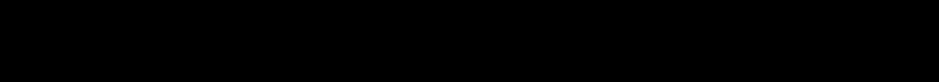
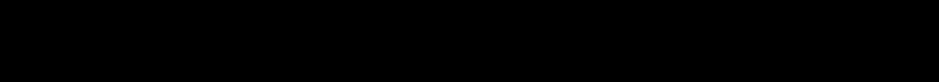
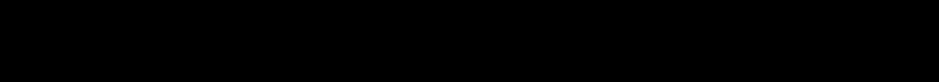

In [46]:
df_merged.head()

,id,institution_name_bangla,institution_name_english,address_village_holding,address_road,address_post_office,address_post_code,[union],address_ward,address_thana,...,books_received_on,sixth_grade_books_provided,seventh_grade_books_provided,eighth_grade_books_provided,ninth_grade_books_provided,tenth_grade_books_provided,student_type_id,student_type_name,student_type_name_en,generalized_institution_type
0,187108,জিয়াডাঙ্গা আহমাদিয়া দাখিল মাদ্রাসা,ZIADANGA AHMADIA DAKHIL MADRASHA,ziadanga,0,Magurahat,7400,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3,সহশিক্ষা,Co-education,MADRASHA
1,187111,বেলকুচি বহুমুখী মহিলা ডিগ্রি কলেজ,BELKUCHI BAHUMAUKHI WOMENS COLLEGE,SHERNAGAR,SIRAJGANJ ENAYETPUR ROAD,SHOHAGPUR,6741,NaN,NaN,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,মেয়ে,Girl,SCHOOL AND COLLEGE
2,187112,কালিকাপুর সিদ্দিকীয়া দাখিল মাদ্রাসা,KALIKAPUR SIDDIKIA MADRASHA,KALIKAPUR,BALIADANGA TO TALTOLA ROAD,KALIKAPUR,9440,NaN,NaN,263.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3,সহশিক্ষা,Co-education,MADRASHA
3,187114,মিরপুর নিম্ন মাধ্যমিক বিদ্যানিকেতন।,MIRPUR JUNIOR SECONDARY BIDDYA NIKETON,819 (Sultanpur),Beside Mirpur Football Field,Mirpur,7030,NaN,NaN,356.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3,সহশিক্ষা,Co-education,SCHOOL
4,187115,মোশারফ হোসেন প্রধান কলেজ,MOSHARAF HOSSAIN PRODHAN COLLEGE,AZIZPUR,Azizpur,Kawamari,5540,NaN,NaN,431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3,সহশিক্ষা,Co-education,SCHOOL AND COLLEGE


In [47]:
column_generalized_institution_type = df_merged['generalized_institution_type'].name
df_total_institution_type_with_count = (
    df_merged[df_merged['generalized_institution_type'].isin(['SCHOOL', 'SCHOOL AND COLLEGE', 'MADRASHA'])]
    .groupby(column_generalized_institution_type)
    .size()
    .reindex(INSTITUTION_TYPES_ORDER)
    .reset_index(name='total')
)

In [48]:
df_total_institution_type_with_count.head()

,generalized_institution_type,total
0,SCHOOL,25323
1,SCHOOL AND COLLEGE,6198
2,MADRASHA,11498


In [49]:
df_pbgsi_institutions = df_merged[df_merged['pbgsi_scheme']==1]

In [50]:
df_pbgsi_institutions = pd.merge(df_pbgsi_institutions, pbgsi_institutions, left_on="eiin", right_on="EIIN", how='inner')

In [51]:
df_total_pbgsi_institution_type_with_count = (
    df_pbgsi_institutions[ df_pbgsi_institutions['generalized_institution_type'].isin(['SCHOOL', 'SCHOOL AND COLLEGE', 'MADRASHA'])]
    .groupby(column_generalized_institution_type)
    .size()
    .reindex(INSTITUTION_TYPES_ORDER)
    .reset_index(name='total')
)

In [52]:
df_total_institution_type_with_count.head()

,generalized_institution_type,total
0,SCHOOL,25323
1,SCHOOL AND COLLEGE,6198
2,MADRASHA,11498


In [53]:
df_total_pbgsi_refunded_institution_type_with_count = (
    df_pbgsi_institutions[df_pbgsi_institutions['was_returned']==1 & df_pbgsi_institutions['generalized_institution_type'].isin(['SCHOOL', 'SCHOOL AND COLLEGE', 'MADRASHA'])]
    .groupby(column_generalized_institution_type)
    .size()
    .reindex(INSTITUTION_TYPES_ORDER)
    .reset_index(name='total')
)

In [54]:
df_total_pbgsi_institution_type_with_count.head()

,generalized_institution_type,total
0,SCHOOL,5006
1,SCHOOL AND COLLEGE,505
2,MADRASHA,1807


In [55]:
print(df_total_institution_type_with_count['generalized_institution_type'].name)

generalized_institution_type


In [56]:
generalized_institution_type_col_name = df_total_institution_type_with_count['generalized_institution_type'].name

df_institution_count = pd.merge(df_total_institution_type_with_count, df_total_pbgsi_institution_type_with_count, on=generalized_institution_type_col_name, how='left', suffixes=('', '_pbgsi'))

In [57]:
df_institution_count = pd.merge(df_institution_count, df_total_pbgsi_refunded_institution_type_with_count, on=generalized_institution_type_col_name, how='left', suffixes=('', '_refunded'))

In [58]:
df_institution_count.head()

,generalized_institution_type,total,total_pbgsi,total_refunded
0,SCHOOL,25323,5006,122
1,SCHOOL AND COLLEGE,6198,505,16
2,MADRASHA,11498,1807,30


In [59]:
df_institution_count['pbgsi_percentage'] = round((df_institution_count.total_pbgsi / df_institution_count.total) * 100, 2)
df_institution_count['refund_percentage'] = round((df_institution_count.total_refunded / df_institution_count.total_pbgsi) * 100, 2)

In [60]:
df_institution_count.head()

,generalized_institution_type,total,total_pbgsi,total_refunded,pbgsi_percentage,refund_percentage
0,SCHOOL,25323,5006,122,19.77,2.44
1,SCHOOL AND COLLEGE,6198,505,16,8.15,3.17
2,MADRASHA,11498,1807,30,15.72,1.66


In [61]:
total_institutions_sum = df_institution_count['total'].sum()
total_pbgsi_sum = df_institution_count['total_pbgsi'].sum()
total_refund_sum = df_institution_count['total_refunded'].sum()

total_pbgsi_percentage = round((total_pbgsi_sum / total_institutions_sum)*100, 2)
total_refund_percentage = round((total_refund_sum / total_pbgsi_sum) * 100, 2)

df_institution_count.loc[len(df_institution_count)] = [
    'Total',
    total_institutions_sum,
    total_pbgsi_sum,
    total_refund_sum,
    total_pbgsi_percentage,
    total_refund_percentage
]

df_institution_count.head()

,generalized_institution_type,total,total_pbgsi,total_refunded,pbgsi_percentage,refund_percentage
0,SCHOOL,25323,5006,122,19.77,2.44
1,SCHOOL AND COLLEGE,6198,505,16,8.15,3.17
2,MADRASHA,11498,1807,30,15.72,1.66
3,Total,43019,7318,168,17.01,2.30


In [62]:
selected_columns = [
    df_institution_count.generalized_institution_type.name,
    df_institution_count.total_pbgsi.name,
    df_institution_count.pbgsi_percentage.name,
    df_institution_count.total_refunded.name,
    df_institution_count.refund_percentage.name
]

renamed_columns = {
    'generalized_institution_type': 'Type of institution',
    'total_pbgsi': 'Number of pbgsi institute',
    'pbgsi_percentage': 'pbgsi percentage',
    'total_refunded': 'Number of refunded institute',
    'refund_percentage': 'refund percentage'
}

df_export = df_institution_count[selected_columns].rename(columns=renamed_columns)
df_export.to_excel('output/table1_pbgsi.xlsx', index=False)

### Table 2. Number of Secondary Institutions Having Management Accountability Grant by Type of institution and Gender Composition

In [63]:
df_pbgsi_institutions.head()

,id,institution_name_bangla,institution_name_english,address_village_holding,address_road,address_post_office,address_post_code,[union],address_ward,address_thana,...,tenth_grade_books_provided,student_type_id,student_type_name,student_type_name_en,generalized_institution_type,REF NO,DISTRICT,UPAZILA,ORGANIZATION_NAME,EIIN
0,187117,মনসুর মহসিন ডৌবাড়ী উচ্চ বিদ্যালয়,MANSUR MOHSIN DOWBARI HIGH SCHOOL,DOWBARHI,DOWBARHI Gowainghat,DOUBARHI,3150,NaN,NaN,207.0,...,32.0,3,সহশিক্ষা,Co-education,SCHOOL,4757,Sylhet,Gowainghat,MANSUR MAHSIN DOWBARI HIGH SCHOOL,130317
1,187139,আব্দুল জলিল একাডেমী,ABDUL JALIL ACADEMY,Annayapur,NaN,Shibaloy,1850,NaN,NaN,514.0,...,NaN,3,সহশিক্ষা,Co-education,SCHOOL,2411,Manikganj,Shibalaya,ABDUL JALIL ACADEMY,111046
2,187144,কৃষ্ণপুর জোহরা বালিকা উচ্চ বিদ্যালয়,KRISHNAPUR ZOHARA GIRLS HIGH SCHOOL,KRISNAPUR,Jaforbari sarok,Mahamaya,3600,NaN,NaN,107.0,...,40.0,2,মেয়ে,Girl,SCHOOL,5495,CHANDPUR,CHANDPUR SADAR,KRISHNAPUR ZOHRA GIRLS HIGH SCHOOL,103522
3,187149,কাঠালতলী মাধ্যমিক বিদ্যালয়,KATHALTALI SECONDARY SCHOOL,KATHALTALI,KATHALTALI,1,8611,NaN,NaN,359.0,...,NaN,3,সহশিক্ষা,Co-education,SCHOOL,193,Patuakhali,Mirzaganj,KATHALTALI SECONDARY SCHOOL,102407
4,187165,কামোর উচ্চ বিদ্যালয়,KAMORE HIGH SCHOOL,KAMORE,Bochaganj-Kaharole rd,Kamore Hat,5226,NaN,NaN,253.0,...,48.0,3,সহশিক্ষা,Co-education,SCHOOL,3634,Dinajpur,Kaharole,KAMOR HIGH SCHOOL,120540


In [64]:
STUDENT_TYPES = ['Boy', 'Girl', 'Co-education']

In [65]:
df_institution_type_count_for_boys = (
    df_pbgsi_institutions[df_pbgsi_institutions['student_type_name_en']=='Boy']
    .groupby(generalized_institution_type_col_name)
    .size()
    .reindex(INSTITUTION_TYPES_ORDER)
    .reset_index(name='boys')
)

In [66]:
df_institution_type_count_for_boys.head()

,generalized_institution_type,boys
0,SCHOOL,54
1,SCHOOL AND COLLEGE,2
2,MADRASHA,5


In [67]:
df_institution_type_count_for_girls = (
    df_pbgsi_institutions[df_pbgsi_institutions['student_type_name_en']=='Girl']
    .groupby(generalized_institution_type_col_name)
    .size()
    .reindex(INSTITUTION_TYPES_ORDER)
    .reset_index(name='girls')
)

In [69]:
df_institution_type_count_for_girls.head()

,generalized_institution_type,girls
0,SCHOOL,720
1,SCHOOL AND COLLEGE,76
2,MADRASHA,155


In [68]:
df_institution_type_count_for_coeducation = (
    df_pbgsi_institutions[df_pbgsi_institutions['student_type_name_en']=='Co-education']
    .groupby(generalized_institution_type_col_name)
    .size()
    .reindex(INSTITUTION_TYPES_ORDER)
    .reset_index(name='co_education')
)

In [70]:
df_institution_type_count_for_coeducation.head()

,generalized_institution_type,co_education
0,SCHOOL,4232
1,SCHOOL AND COLLEGE,427
2,MADRASHA,1647


In [76]:
df_institution_type_gender_composition = pd.merge(df_institution_type_count_for_boys, df_institution_type_count_for_girls, on=generalized_institution_type_col_name, how='inner', suffixes=('_boys', '_girls'))
df_institution_type_gender_composition.head()

,generalized_institution_type,boys,girls
0,SCHOOL,54,720
1,SCHOOL AND COLLEGE,2,76
2,MADRASHA,5,155


In [77]:
df_institution_type_gender_composition = pd.merge(df_institution_type_gender_composition, df_institution_type_count_for_coeducation, on=generalized_institution_type_col_name, how='inner', suffixes=('', '_coeducation'))
df_institution_type_gender_composition.head()

,generalized_institution_type,boys,girls,co_education
0,SCHOOL,54,720,4232
1,SCHOOL AND COLLEGE,2,76,427
2,MADRASHA,5,155,1647


In [78]:
total_boys = df_institution_type_gender_composition['boys'].sum()
total_girls = df_institution_type_gender_composition['girls'].sum()
total_coeducation = df_institution_type_gender_composition['co_education'].sum()

In [ ]:
df_institution_type_gender_composition.loc[len(df_institution_type_gender_composition)] = [
    'Total',
    total_boys,
    total_girls,
    total_coeducation
]

In [80]:
df_institution_type_gender_composition.to_excel('output/table2_pbgsi_institution_type_gender_decomposition.xlsx',index=False)

### Table 3. Distribution of secondary institutions having Management Accountability Grant by Division and type of institution

Join division, district and thana

In [83]:
division_id_col_name = divisions.division_id.name
district_id_col_name = districts.district_id.name
thana_id_col_name = thanas.thana_id.name

general_info_division_col_name = general_information.address_division.name
general_info_district_col_name = general_information.address_district.name
general_info_thana_col_name = general_information.address_thana.name

df_pbgsi_institutions = pd.merge(df_pbgsi_institutions, divisions, left_on=general_info_division_col_name, right_on=division_id_col_name, how='inner', suffixes=('', '_division'))
df_pbgsi_institutions = pd.merge(df_pbgsi_institutions, districts, left_on=general_info_district_col_name, right_on=district_id_col_name, how='inner', suffixes=('', '_district'))
df_pbgsi_institutions = pd.merge(df_pbgsi_institutions, thanas, left_on=general_info_thana_col_name, right_on=thana_id_col_name, how='inner', suffixes=('', '_thana'))

df_pbgsi_institutions.head()

,id,institution_name_bangla,institution_name_english,address_village_holding,address_road,address_post_office,address_post_code,[union],address_ward,address_thana,...,district_name_bn_district,division_id_district,district_code_district,thana_id_thana,thana_code_thana,thana_id_legacy_thana,thana_name_thana,thana_name_bn_thana,district_id_thana,city_corp_thana
0,187117,মনসুর মহসিন ডৌবাড়ী উচ্চ বিদ্যালয়,MANSUR MOHSIN DOWBARI HIGH SCHOOL,DOWBARHI,DOWBARHI Gowainghat,DOUBARHI,3150,NaN,NaN,207.0,...,সিলেট,7,91.0,207,6091.0,609141.0,Gowainghat,গোয়াইনঘাট,63,NaN
1,187139,আব্দুল জলিল একাডেমী,ABDUL JALIL ACADEMY,Annayapur,NaN,Shibaloy,1850,NaN,NaN,514.0,...,মানিকগঞ্জ,4,56.0,514,3056.0,305678.0,Shibalaya,শিবালয়,36,NaN
2,187144,কৃষ্ণপুর জোহরা বালিকা উচ্চ বিদ্যালয়,KRISHNAPUR ZOHARA GIRLS HIGH SCHOOL,KRISNAPUR,Jaforbari sarok,Mahamaya,3600,NaN,NaN,107.0,...,চাঁদপুর,3,13.0,107,2013.0,201322.0,Chandpur Sadar,চাঁদপুর সদর,9,NaN
3,187149,কাঠালতলী মাধ্যমিক বিদ্যালয়,KATHALTALI SECONDARY SCHOOL,KATHALTALI,KATHALTALI,1,8611,NaN,NaN,359.0,...,পটুয়াখালী,2,78.0,359,1078.0,107876.0,Mirzaganj Upazila,মির্জাগঞ্জ উপজেলা,52,NaN
4,187165,কামোর উচ্চ বিদ্যালয়,KAMORE HIGH SCHOOL,KAMORE,Bochaganj-Kaharole rd,Kamore Hat,5226,NaN,NaN,253.0,...,দিনাজপুর,8,27.0,253,5527.0,552756.0,Kaharole,কাহারোল,15,NaN
